# NEC winter-school: second exercise

In this exercise you will learn how to create and to train a CNN that can classify digits. 

During this exercise we will learn the basics of Tensorflow and we will get some intuition on how the CNN works.

Note: this notebook is based on the following tutorial https://www.tensorflow.org/tutorials/quickstart/advanced

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np                     # Basic array operation library
import matplotlib.pyplot as plt        # For plotting and displaying
%matplotlib inline

Load dataset:

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0         # Rescale the image values to [0,1]

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

Display a grid of 5x5 digits:

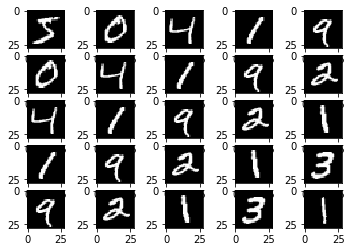

In [11]:
# Add code
for ix in range(5):
    for ij in range(5):
        plt.subplot(5,5,1 + ix + ij*5)
        im = x_train[ix + ij, :, :, 0]
        plt.imshow(im, cmap='gray')

Print the 25 first labels:

In [13]:
print(y_train[0:25])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


Create dataset feeder:

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

Create the model.

Here you have to complete the code to create your model. 

*Requirement*, the dimensionality of the last layer has to be 2.

In [15]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(2, activation='relu')
        self.d3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return self.d3(x)

    def get_emb(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
    
    def compute_n_trainable_variables(self):
        return int(np.sum([np.prod(v.get_shape().as_list()) for v in self._model.trainable_variables]))

Now we compile the model and train it. For simplicity, we will use the Keras interfaces, but if you want to have more control over the training, please follow the tutorial of the link provided at the beginning of this notebook.

In [16]:
# Create an instance of the model
model = MyModel()

model.compile(optimizer='adam',                         # Optimizer
              loss='sparse_categorical_crossentropy',   # Loss function
              metrics=['accuracy'])                     # Test metric to control that everything is working well

In [17]:
print("Training %d variables"%model.compute_n_trainable_variables())

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 718us/sample - loss: 1.0899 - accuracy: 0.6011
Epoch 2/5
60000/60000 [==============================] - 43s 714us/sample - loss: 0.6698 - accuracy: 0.7550
Epoch 3/5
60000/60000 [==============================] - 43s 718us/sample - loss: 0.4312 - accuracy: 0.8816
Epoch 4/5
60000/60000 [==============================] - 43s 712us/sample - loss: 0.2212 - accuracy: 0.9606
Epoch 5/5
60000/60000 [==============================] - 46s 771us/sample - loss: 0.1418 - accuracy: 0.9729


Now we test our model in unseen data.

For this particular case, we use the "test" split.

Typically in machine learning, we work with 3 splits: train, validation, and test.
* The train split is the one used for fitting the model.
* The validation is used during the training to fit the hyperparameter of the model.
* The test split is the one used to report the performance of the model.

In [18]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 2s - loss: 0.1485 - accuracy: 0.9627


[0.24873584313988686, 0.9627]

If you got a 0.96 of accuracy over the test set or so, it is a sign that your model is trained properly.

Now, plot in a grid some of the filters that your CNN learned.

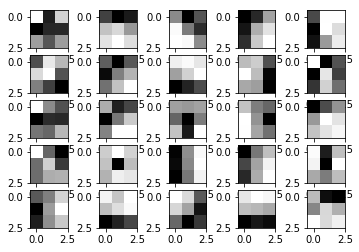

In [46]:
# Add code
conv_filters = [v for v in model.conv1.trainable_variables]
# It has the weights (in 0) and the bias (in 1), we will plot just he weights
conv_filters = conv_filters[0]
# Print it
for ix in range(5):
    for jx in range(5):
        idx = ix+jx*5
        plt.subplot(5,5,1+idx)
        plt.imshow(conv_filters[:,:,0,idx], cmap='gray')

Create a 2d scatter plot with the 2d embedding of the test samples. Plot them together with the labels.

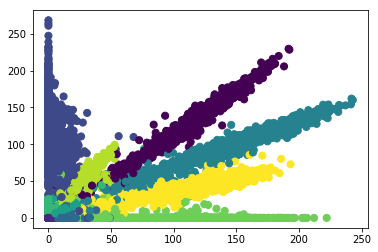

In [50]:
emb_test = model.get_emb(x_test)
plt.scatter(emb_test[:,0], emb_test[:,1], s=np.ones_like(y_test)*50, c=y_test)